# Comparison of Bitcoin price (in USD) with the number of transactions
After reading this [blog](https://www.swanbitcoin.com/how-much-of-the-worlds-population-owns-bitcoin-today/) about how much of the world's population owns Bitcoin today. I was struck by how Callahan said that "an early Bitcoin investor, Wences Casares [observed] that...the amount of users of the Bitcoin network is directly proportional to the bitcoin price." To test this hypotheses I set out on analyzing the price of Bitcoin for the last five years and comparing it with the number of transactions.


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [41]:
transactions = pd.read_csv("n-transactions")

csv can be downloaded from [here](https://studio.glassnode.com/metrics?a=BTC&m=addresses.ActiveCount&upgradePlan=advanced)

In [42]:
transactions["Timestamp"] = pd.to_datetime(transactions["Timestamp"]).dt.date

In [43]:
transactions = transactions.rename(columns={"Timestamp":"Date","n-transactions":"Transactions"})

In [44]:
transactions.index = transactions.pop('Date')

In [45]:
# transactions
type(transactions)

pandas.core.frame.DataFrame

In [51]:
btc = pd.read_csv("btc.csv")

csv can be downloaded from [here](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD)

In [52]:
btc["Date"] = pd.to_datetime(btc["Date"])

In [53]:
type(btc)

pandas.core.frame.DataFrame

In [54]:
btc.index = btc.pop("Date")
btc = btc.rename(columns={"Close":"Price"})
btc = pd.DataFrame(btc["Price"])

In [55]:
type(btc)

pandas.core.frame.DataFrame

In [56]:
df = btc.join(transactions)

In [57]:
df

,Price,Transactions
Date,,
2017-06-06,2863.199951,NaN
2017-06-07,2732.159912,339720.0
2017-06-08,2805.620117,NaN
2017-06-09,2823.810059,NaN
2017-06-10,2947.709961,254993.0
...,...,...
2022-06-02,30467.488281,264901.0
2022-06-03,29704.390625,NaN
2022-06-04,29832.914063,NaN


There are a lot of null values for the transactions, in order to account for this I will drop all the null values below

In [58]:
(type(y),
type(X))

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [59]:
df.describe()

,Price,Transactions
count,1827.000000,609.000000
mean,18736.539679,278894.216749
std,17621.459152,54235.505486
min,1929.819946,135274.000000
25%,6648.179931,238634.000000
50%,9522.981445,280805.000000
75%,33734.515625,317597.000000
max,67566.828125,439549.000000


In [60]:
df = df.dropna()

Dropping all the null values the dataframe looks like this

In [89]:
df

,Price,Transactions
Date,,
2017-06-07,2732.159912,339720.0
2017-06-10,2947.709961,254993.0
2017-06-13,2717.020020,291776.0
2017-06-16,2518.560059,269937.0
2017-06-19,2589.600098,269774.0
...,...,...
2022-05-24,29655.585938,235866.0
2022-05-27,28627.574219,270453.0
2022-05-30,31726.390625,271819.0


In [61]:
X = pd.DataFrame(df["Transactions"])
y = pd.DataFrame(df["Price"])

took inspiration from [this](https://www.statology.org/matplotlib-two-y-axes/) website for the plot below.

Text(0, 0.5, 'BTC-USD ($)')

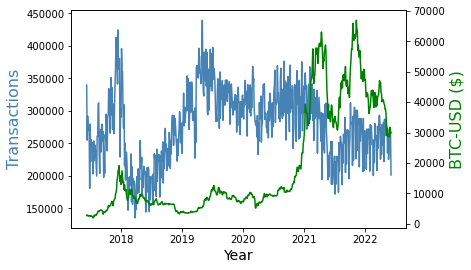

In [95]:
#define subplots
col1 = 'steelblue'
col2 = 'green'
fig,ax = plt.subplots()

#add first line to plot
ax.plot(X, color=col1)
#add x-axis label
ax.set_xlabel('Year', fontsize=14)
#add y-axis label
ax.set_ylabel('Transactions', color=col1, fontsize=16)
#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
#add second line to plot
ax2.plot(y, color=col2)
#add second y-axis label
ax2.set_ylabel('BTC-USD ($)', color=col2, fontsize=16)

As you can see in the plot above, you can see that the pattern of the peaks and throughs of the number of transactions is resembles the peaks and throughs of the price. This could mean that they interact with each other. 

In [100]:
df.corr()

,Price,Transactions
Price,1.000000,-0.104293
Transactions,-0.104293,1.000000


.corr() here is used to calculate the relationship between the price and transactions, you can see that they have a correlation of -0.10, which means that they are badly correlated.
- perfect correlation: 1.0
- good correlation: corr >= 0.6
- bad correlation: corr < 0.6

In [77]:
split = int(0.9*len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [78]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((548, 1), (548, 1), (61, 1), (61, 1))